## TensorFlow - Keras

* Keras - API de alto nivel que proporciona capas, optimizadores, y clases ya hechas para creación de redes neuronales.


* TensorFlow - API bajo nivel motor de cómputo para entrenar las redes neuronales con los cálculos de gradientes y actualización de parámetros.
Proceso en Scikit:

* model = MLPRegressor(hidden_layer_sizes=(2), max_iter=2000, random_state=42)
* model.fit(X_train, y_train)
* y_pred = model.predict(X_test)
* model.score(X_train, y_train) --> R2 o accuracy
* model.score(X_test, y_test) --> R2 o accuracy
* joblib.dump(model, 'model.joblib')

Proceso en TensorFlow-Keras:

* model = Sequential([Dense(32, activation='relu'), Dense(1)])
* model.compile(loss='mse', optimizer='adam', metrics=['mae'])
* model.fit(X_train, y_train, epochs=10, validation_split=0.2)
* model.history.history que podemos ver las métricas obtenidas durante el entrenamiento
* model.evaluate(X_test, y_test) --> devuelve el loss y las métricas definidas en compile
* model.predict(X_test)
* model.save('model.keras')

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
keras = tf.keras

print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [2]:
df = sns.load_dataset('mpg').dropna()
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
# 0 opcional: estableceresto es una semilla para que nos de a todos el mismo resultado
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [4]:
#1 crear la arquitectura de la red neuronal
model = keras.Sequential([
    #keras.layers.Input(shape=(X.shape[1],)), #crea la capa de entrada, es opcional, nro de columnas automatico 
    #keras.layers.Input(shape=(6,)), # otra forma de capa de entrada indicando nro columnas
    keras.layers.Dense(50, activation='relu'), #crea una capa con 50 neuronas
    keras.layers.Dense(50, activation='relu'), # crea una segunda capa de 50 neuronas
    keras.layers.Dense(1) # para regresion solo una neurona sin funcion activacion (funcion de activacion lineal por defecto)
])
# 2 Compilar el modelo: especificar funcion coste, optimizador, métricas
model.compile(
    loss=keras.losses.MeanSquaredError(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.MeanAbsoluteError(), #MAE
        keras.metrics.RootMeanSquaredError(), #RMSE
        keras.metrics.MeanAbsolutePercentageError() #MAPE
    ]
)

In [5]:
# 3 Entrenamiento de la red neuronal
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 61512.8750 - mean_absolute_error: 213.9476 - mean_absolute_percentage_error: 1151.7104 - root_mean_squared_error: 242.5990 - val_loss: 9151.2080 - val_mean_absolute_error: 94.3738 - val_mean_absolute_percentage_error: 442.2468 - val_root_mean_squared_error: 95.6619
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13936.8086 - mean_absolute_error: 114.9703 - mean_absolute_percentage_error: 595.1465 - root_mean_squared_error: 117.8204 - val_loss: 3916.0833 - val_mean_absolute_error: 62.0055 - val_mean_absolute_percentage_error: 285.8053 - val_root_mean_squared_error: 62.5786
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2076.2952 - mean_absolute_error: 39.8282 - mean_absolute_percentage_error: 204.0685 - root_mean_squared_error: 44.6821 - val_loss: 3004.7114 - val_mean_absolute_error: 48.6304 - val_mean_absolute_percentage_error: 254.3333 - val_root_mean_squared_error: 54.8152
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,855 (34.59 KB)

 Trainable params: 2,951 (11.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,904 (23.07 KB)

In [6]:
df_results = pd.DataFrame(model.history.history)
df_results.head(10)

,loss,mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error,val_loss,val_mean_absolute_error,val_mean_absolute_percentage_error,val_root_mean_squared_error
0,34521.824219,141.517471,759.262390,185.800491,9151.208008,94.373833,442.246765,95.661949
1,13590.763672,113.127525,579.208130,116.579430,3916.083252,62.005486,285.805328,62.578617
2,1572.044922,33.071724,174.846283,39.649021,3004.711426,48.630360,254.333328,54.815247
3,2858.085693,45.932480,257.505463,53.461067,199.252487,11.874064,62.524841,14.115683
4,519.720337,19.877642,93.207794,22.797375,984.740051,30.825459,135.641739,31.380568
5,443.883301,18.196609,85.692802,21.068539,161.050552,10.960402,55.859928,12.690570
6,289.063171,13.728535,78.293060,17.001858,151.854538,10.705121,53.938873,12.322927
7,135.715271,9.750001,44.115490,11.649690,215.616180,12.278196,46.419815,14.683875
8,124.483498,9.146066,38.648903,11.157217,118.184479,9.330520,42.372528,10.871268
9,113.515900,8.653651,43.446579,10.654384,116.402748,9.184105,40.213104,10.789011


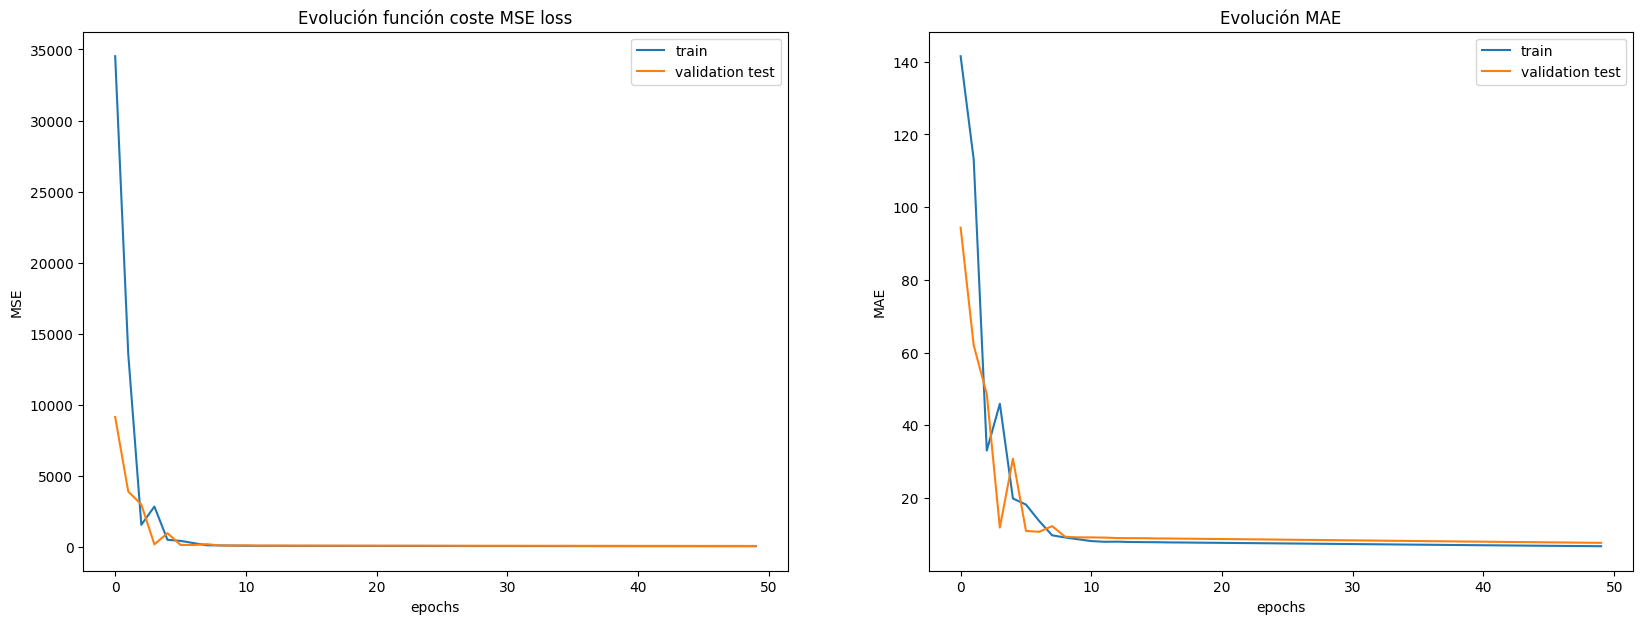

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(df_results['loss'], label='train')
plt.plot(df_results['val_loss'], label='validation test')
plt.title('Evolución función coste MSE loss')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_results['mean_absolute_error'], label='train')
plt.plot(df_results['val_mean_absolute_error'], label='validation test')
plt.title('Evolución MAE')
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.legend();

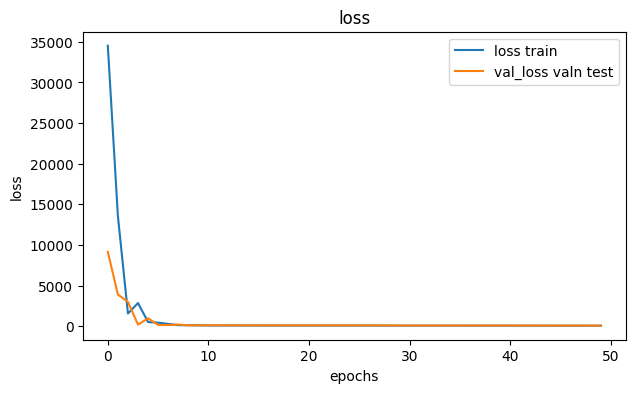

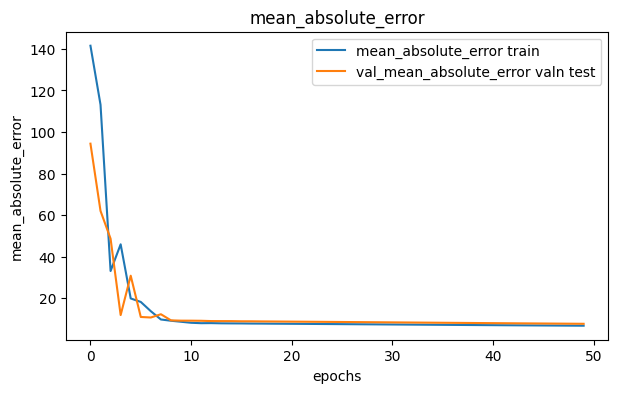

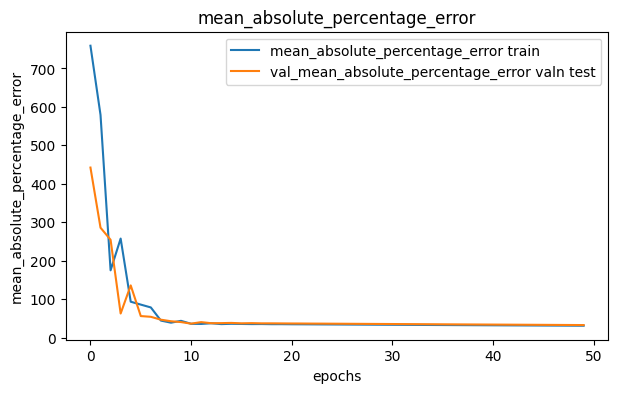

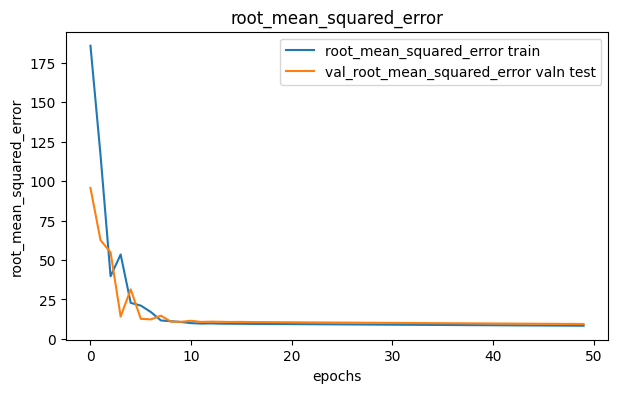

In [8]:
def plot_history(df_results):
    train_metrics = [col for col in df_results.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 4))
        plt.plot(df_results[metric], label=f'{metric} train')
        
        val_metric = f'val_{metric}'
        if val_metric in df_results.columns:
            plt.plot(df_results[val_metric], label=f'{val_metric} valn test')
        
        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        
plot_history(df_results)

In [9]:
#se le pasan los datos de test
test_mse_loss, test_mae, test_rmse, test_mape = model.evaluate(X_test, y_test, verbose=1)
print('test_mse_loss', test_mse_loss)
print('test_mae', test_mae)
print('test_rmse', test_rmse)
print('test_mape', test_mape)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 57.3179 - mean_absolute_error: 6.0434 - mean_absolute_percentage_error: 27.7001 - root_mean_squared_error: 7.5653
test_mse_loss 57.296905517578125
test_mae 5.9765167236328125
test_rmse 7.569471836090088
test_mape 27.86292266845703


In [10]:
y_pred  = model.predict(X_test)[:5] #matriz de dos dimensiones
y_pred = model.predict(X_test).ravel() # con el ravel lo pasamos a una dimension
y_pred[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([24.259947, 24.191603, 20.074736, 20.825842, 27.597914, 22.691847,
       19.198545, 24.904997, 24.438192, 25.482908], dtype=float32)

In [11]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
print('mae test', mean_absolute_error(y_test, y_pred))
print('rmse test', root_mean_squared_error(y_test, y_pred))
print('mape test', mean_absolute_percentage_error(y_test, y_pred))

mae test 5.9765166137791885
rmse test 7.569472028749313
mape test 0.2786292202327745


In [12]:
df_comparison = pd.DataFrame({'real': y_test, 'prediccion':y_pred, 'residuo': y_test - y_pred})
df_comparison.head()

,real,prediccion,residuo
79,26.0,24.259947,1.740053
276,21.6,24.191603,-2.591603
248,36.1,20.074736,16.025264
56,26.0,20.825842,5.174158
393,27.0,27.597914,-0.597914


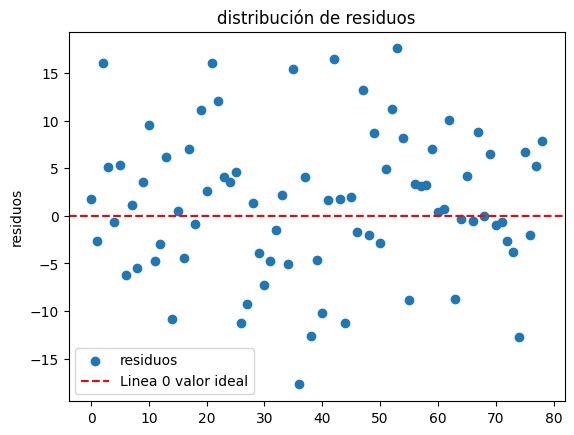

In [13]:
plt.scatter(range(len(df_comparison)), df_comparison['residuo'], label ='residuos')
plt.axhline(y=0, color='r', linestyle='dashed', label='Linea 0 valor ideal')
plt.ylabel('residuos')
plt.title('distribución de residuos')
plt.legend();

## Guardar modelo

In [14]:
#exportar el modelo
model.save('modelo_entrenado.keras')

In [15]:
#importar modelo ( esto lo hariamos en una aplicacion Flask por ejemplo y lo ejecutaríamos en un servidor)
modelo_cargado = keras.models.load_model('modelo_entrenado.keras')  # este modelo ya está entrenado
#modelo_cargado.sumary()

In [16]:
modelo_cargado.predict(X_test).ravel()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([24.259947 , 24.191603 , 20.074736 , 20.825842 , 27.597914 ,
       22.691847 , 19.198545 , 24.904997 , 24.438192 , 25.482908 ,
        5.4808326, 23.686148 , 19.87428  , 22.818342 , 26.999723 ,
       27.527174 , 24.460752 , 25.41136  , 28.225454 , 23.906736 ,
       19.339216 , 27.953588 , 22.070066 , 13.953642 , 22.390753 ,
       21.423246 , 32.300198 , 25.225042 , 24.598715 , 25.922796 ,
       22.247313 , 24.103865 , 20.67816  , 29.406713 , 18.10443  ,
       22.53945  , 31.713346 , 20.955046 , 25.62808  , 14.6283245,
       23.250517 , 22.31198  , 19.465055 , 24.209723 , 25.266691 ,
       10.983488 , 20.732359 , 24.018011 , 23.042234 , 20.28758  ,
       16.869856 , 19.096739 , 16.813063 , 18.405691 , 13.861563 ,
       24.803122 , 16.689917 , 16.826963 , 21.768354 , 17.9503   ,
       11.588102 , 21.822172 , 16.682081 , 31.711714 , 21.441587 ,
       20.821348 , 25.636541 , 20.165792 , 19.912886 ,  8.448301 ,
       22.905577 , 13.602522 , 24.66963  , 21.766638 , 30.2977

In [17]:
#exportar la configuracion del modelo
#model.get_config() lo podemos ver asi
config = model.to_json() #lo exportamos asi
config

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 6], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 50, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": 

In [18]:
#cargar configuracion
new_model = keras.models.model_from_json(config)
new_model.get_config() # habria que entrenar estre nuevo modelo

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 6),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 50,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer

In [19]:
# exportar pesos
model.save_weights('pesos_modelo.weights.h5')

In [20]:
# cargar pesos a otro modelo con la misma configuracion
new_model.load_weights('pesos_modelo.weights.h5')
new_model.compile(
    loss=keras.losses.MeanSquaredError(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.MeanAbsoluteError(), # MAE
        keras.metrics.RootMeanSquaredError(), # RMSE
        keras.metrics.MeanAbsolutePercentageError() # MAPE
    ]
)
new_model.predict(X_test).ravel()

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001DBBB240C20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([24.259947 , 24.191603 , 20.074736 , 20.825842 , 27.597914 ,
       22.691847 , 19.198545 , 24.904997 , 24.438192 , 25.482908 ,
        5.4808326, 23.686148 , 19.87428  , 22.818342 , 26.999723 ,
       27.527174 , 24.460752 , 25.41136  , 28.225454 , 23.906736 ,
       19.339216 , 27.953588 , 22.070066 , 13.953642 , 22.390753 ,
       21.423246 , 32.300198 , 25.225042 , 24.598715 , 25.922796 ,
       22.247313 , 24.103865 , 20.67816  , 29.406713 , 18.10443  ,
       22.53945  , 31.713346 , 20.955046 , 25.62808  , 14.6283245,
       23.250517 , 22.31198  , 19.465055 , 24.209723 , 25.266691 ,
       10.983488 , 20.732359 , 24.018011 , 23.042234 , 20.28758  ,
       16.869856 , 19.096739 , 16.813063 , 18.405691 , 13.861563 ,
       24.803122 , 16.689917 , 16.826963 , 21.768354 , 17.9503   ,
       11.588102 , 21.822172 , 16.682081 , 31.711714 , 21.441587 ,
       20.821348 , 25.636541 , 20.165792 , 19.912886 ,  8.448301 ,
       22.905577 , 13.602522 , 24.66963  , 21.766638 , 30.2977

## API Fuctional
Crear el modelo especificando capa por capa por separado sin Sequential.

Opción más flexible para arquitecturas más complejas.

Como desventaja: lleva más código y más trabajo de configurar.

In [21]:

keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# 1. Crear arquitectura:
input_layer = keras.layers.Input(shape=(X.shape[1],))
dense_layer_1 = keras.layers.Dense(64, activation='relu')(input_layer) #encadenar con la anterior
dense_layer_2 = keras.layers.Dense(32, activation='relu')(dense_layer_1)
output_layer = keras.layers.Dense(1)(dense_layer_2)

# 2. Crear modelo:
keras.models.Model(inputs=input_layer, outputs=output_layer, name='regression_nn')

# 3. Compilar modelo:
model.compile(
    loss=keras.losses.MeanSquaredError(), 
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.MeanAbsoluteError(), #MAE
        keras.metrics.RootMeanSquaredError(), #RMSE
        keras.metrics.MeanAbsolutePercentageError() #MAPE
    ]
)
#4. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 1250.7084 - mean_absolute_error: 26.7440 - mean_absolute_percentage_error: 143.4956 - root_mean_squared_error: 33.9407 - val_loss: 254.8335 - val_mean_absolute_error: 12.7522 - val_mean_absolute_percentage_error: 70.1384 - val_root_mean_squared_error: 15.9635
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 620.9045 - mean_absolute_error: 20.5870 - mean_absolute_percentage_error: 114.0525 - root_mean_squared_error: 24.6404 - val_loss: 626.7547 - val_mean_absolute_error: 23.8059 - val_mean_absolute_percentage_error: 106.6278 - val_root_mean_squared_error: 25.0351
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 390.7177 - mean_absolute_error: 17.2912 - mean_absolute_percentage_error: 88.6136 - root_mean_squared_error: 19.5942 - val_loss: 183.6737 - val_mean_absolute_error: 10.9781 - val_mean_absolute_percentage_error: 59.2891 - val_root_mean_squared_error: 13.5526
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - 

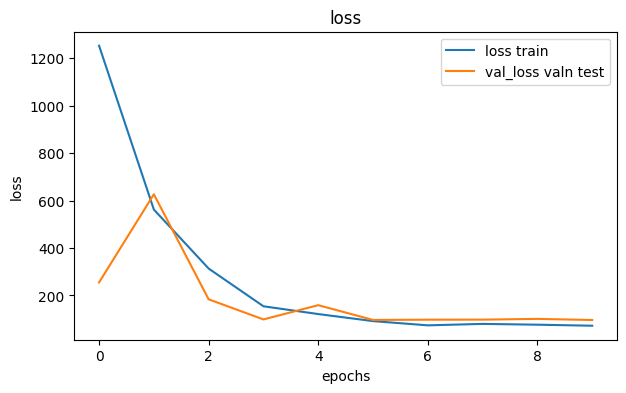

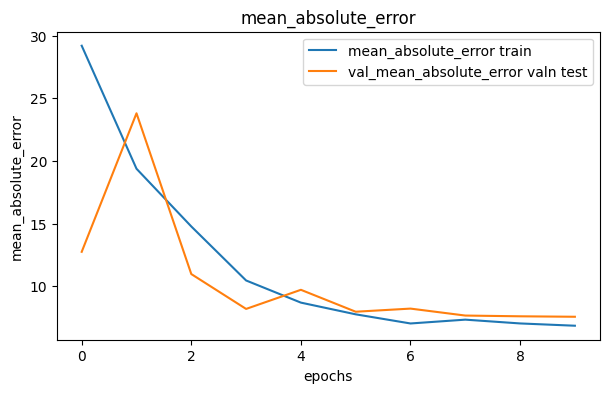

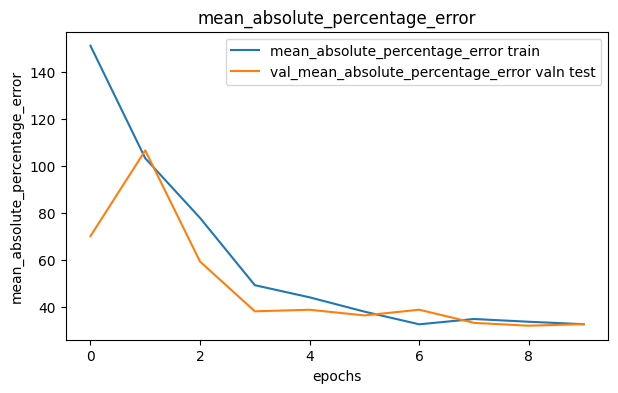

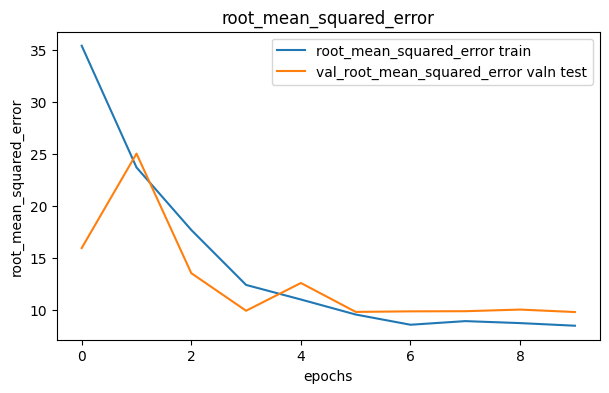

In [22]:
df_results = pd.DataFrame(model.history.history)
plot_history(df_results)